# Hello World: Kaggle Edition ([ie, the Titanic Competition](https://www.kaggle.com/c/titanic))

*by Robert A Brown*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

gender_path = '../data/gender_submission.csv'
train_path = '../data/train.csv'
test_path = '../data/test.csv'

%matplotlib inline

In [2]:
train = pd.read_csv(train_path)
train.Sex = train.Sex.apply(lambda r: 1 if r == 'female' else 0)

catagorical = ['Name', 'Ticket', 'Cabin', 'Embarked']
numeric = [c for c in list(train) if c not in catagorical]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


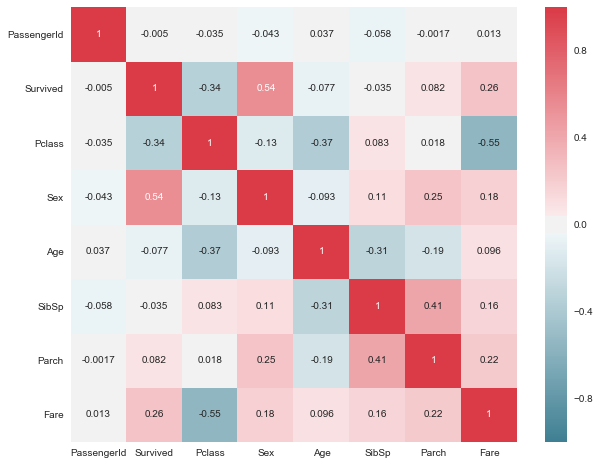

In [3]:
f, ax = plt.subplots(figsize=(10, 8))
heat = sns.heatmap(train.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                   square=False, annot = True, ax=ax)

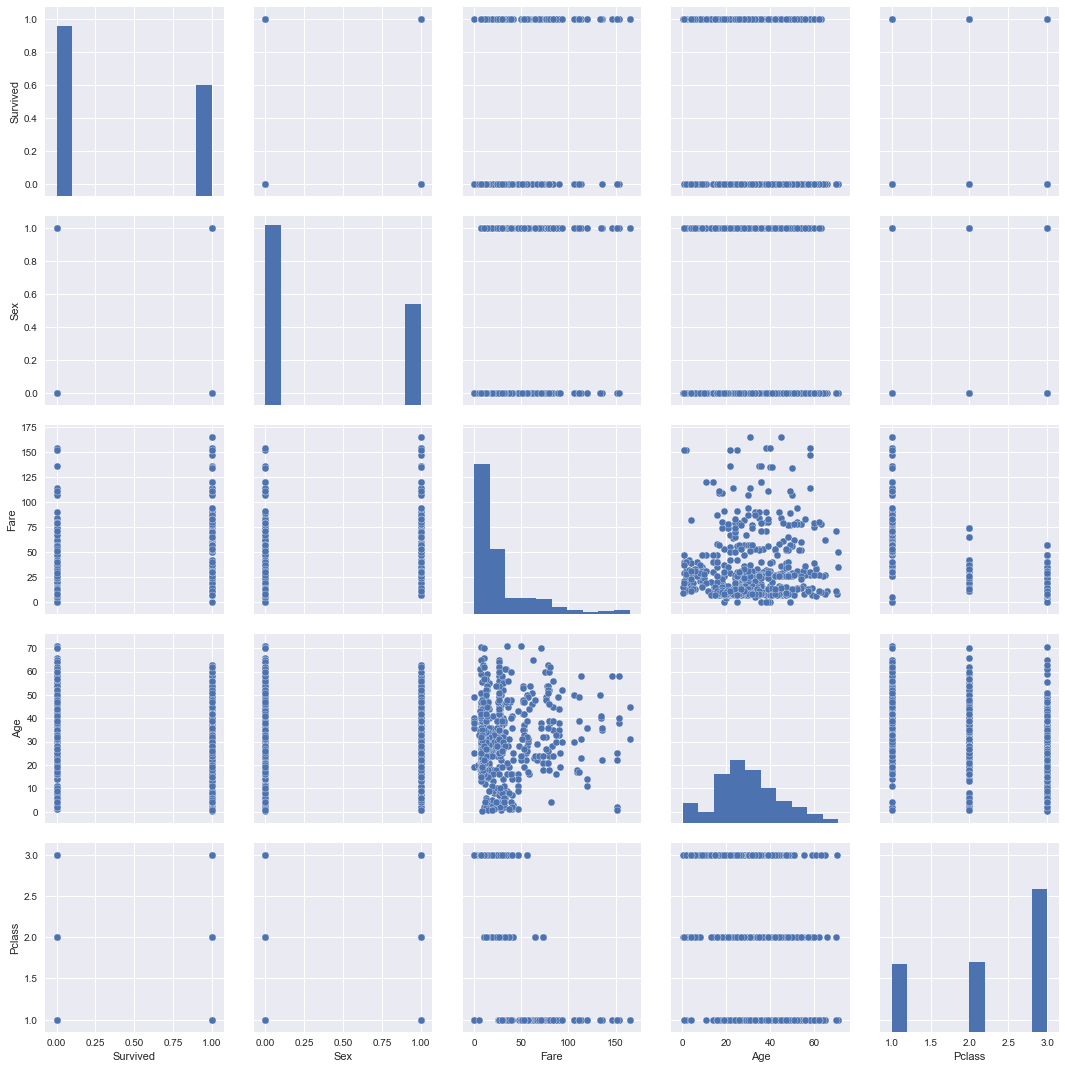

In [4]:
a = ['Survived', 'Sex', 'Fare', 'Age', 'Pclass']
not_nan = np.isfinite(train.Age)
not_outlier = (np.abs(stats.zscore(train[not_nan][a[1:]])) < 3).all(axis=1)
pairs = sns.pairplot(train[not_nan][not_outlier][a], size=3)